# Introduction to Electronic Instruments: Pt. 2 Low Pass Filter
## 2017-01-20

### Recordings
1. Build the circuit in breadboard using 1500 Ohm resistor
2. Attatched oscilloscope to circuit and set function generator
3. Measure values for 100, 300, 1000, 3000, 10 000, 30 000, 100 000 Hz for Amplitude and Phase Shift
4. Record corresponding uncertainties for each


We measured vout and vin by connecting the oscilloscope probes to various parts of the circuit. We counted the number of grids and divisions. For time shift, we set vin at the origin and measured it's relative phase shift with vout.

<pre>
<table class="tg">
  <tr>
    <th class="tg-yw4l">Frequency [Hz]</th>
    <th class="tg-yw4l">Vout</th>
    <th class="tg-yw4l">Vin</th>
    <th class="tg-yw4l">Vout Err</th>
    <th class="tg-yw4l">Vin Err</th>
    <th class="tg-yw4l">Time Shift [ms]</th>
    <th class="tg-yw4l">Time Shift Error</th>
  </tr>
  <tr>
    <td class="tg-yw4l">99</td>
    <td class="tg-yw4l">11</td>
    <td class="tg-yw4l">11</td>
    <td class="tg-yw4l">0.5</td>
    <td class="tg-yw4l">0.5</td>
    <td class="tg-yw4l">0</td>
    <td class="tg-yw4l">0</td>
  </tr>
  <tr>
    <td class="tg-yw4l">300</td>
    <td class="tg-yw4l">11</td>
    <td class="tg-yw4l">11</td>
    <td class="tg-yw4l">0.5</td>
    <td class="tg-yw4l">0.5</td>
    <td class="tg-yw4l">0</td>
    <td class="tg-yw4l">0.05</td>
  </tr>
  <tr>
    <td class="tg-yw4l">1002</td>
    <td class="tg-yw4l">10.6</td>
    <td class="tg-yw4l">11</td>
    <td class="tg-yw4l">0.5</td>
    <td class="tg-yw4l">0.5</td>
    <td class="tg-yw4l">0.2</td>
    <td class="tg-yw4l">0.05</td>
  </tr>
  <tr>
    <td class="tg-yw4l">3000</td>
    <td class="tg-yw4l">9.5</td>
    <td class="tg-yw4l">11</td>
    <td class="tg-yw4l">0.5</td>
    <td class="tg-yw4l">0.5</td>
    <td class="tg-yw4l">0.15</td>
    <td class="tg-yw4l">0.025</td>
  </tr>
  <tr>
    <td class="tg-yw4l">10 003</td>
    <td class="tg-yw4l">4.6</td>
    <td class="tg-yw4l">11</td>
    <td class="tg-yw4l">0.5</td>
    <td class="tg-yw4l">0.5</td>
    <td class="tg-yw4l">0.0165</td>
    <td class="tg-yw4l">0.001</td>
  </tr>
  <tr>
    <td class="tg-yw4l">30 000</td>
    <td class="tg-yw4l">1.7</td>
    <td class="tg-yw4l">11</td>
    <td class="tg-yw4l">0.1</td>
    <td class="tg-yw4l">0.5</td>
    <td class="tg-yw4l">0.008</td>
    <td class="tg-yw4l">0.0005</td>
  </tr>
  <tr>
    <td class="tg-yw4l">100 010</td>
    <td class="tg-yw4l">0.52</td>
    <td class="tg-yw4l">11</td>
    <td class="tg-yw4l">0.02</td>
    <td class="tg-yw4l">0.5</td>
    <td class="tg-yw4l">0.0025</td>
    <td class="tg-yw4l">0.0005</td>
  </tr>
</table>
</pre>



In [8]:
%matplotlib inline
import qexpy as q
import numpy as np
import matplotlib.pyplot as plt

R = 1505 # Ohms
dR = 5
C = 0.0217e-6 # uF 
dC = 0.003e-6

freqs = np.array([99, 300, 1001, 3000, 10003, 30000, 100010])

# Channel 1
vout_amplitudes = np.array([11, 11, 10.6, 9.5, 4.6, 1.7, 0.52])
vout_amplitudes_err = np.array([0.5, 0.5, 0.5, 0.5, 0.2, 0.1, 0.02])

# Channel 2
vin_amplitudes = np.array([11, 11, 11, 11, 11, 11, 11])
vin_amplitudes_err = np.array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

# Time shifts
vout_time_shifts = np.array([0, 0, 0.03, 0.03, 0.0165, 0.008, 0.0025])
vout_time_shifts_err = np.array([0, 0.01, 0.01, 0.0025, 0.001, 0.0005, 0.00005])

## Appendix Analysis


In [9]:
# Theoretical Calculations
q_C = q.Measurement(C, dC)
q_R = q.Measurement(R, dR)
freqs_theoretical = 10**np.arange(2, 5.2, 0.1)
q_H_theoretical = 1/q.sqrt(1 + (2*np.pi*freqs_theoretical * q_R * q_C)**2)
H_theoretical = q_H_theoretical.get_means()
dH_theoretical = q_H_theoretical.get_stds()

In [10]:
# Experimental Calculations
vout = q.MeasurementArray(vout_amplitudes, vout_amplitudes_err)
vin = q.MeasurementArray(vin_amplitudes, vin_amplitudes_err)
q_H = vout/vin
H = q_H.get_means()
dH = q_H.get_stds()
yerrpos = 20 * np.log10(H + dH) - 20 * np.log10(H)
yerrneg = 20 * np.log10(H) - 20 * np.log10(H - dH)
freq_cutoff = 1/(2 * np.pi * R * C)

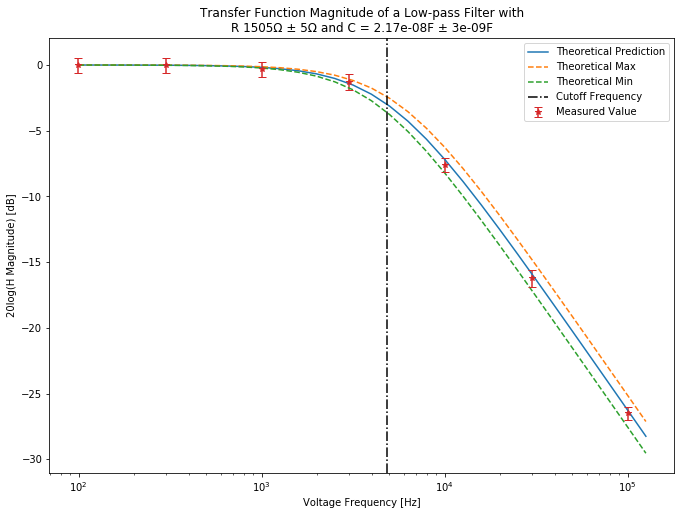

In [11]:
plt.figure(figsize=(11.2, 8))
plt.title("Transfer Function Magnitude of a Low-pass Filter " +
          "with\nR {:1g}Ω ± {:1g}Ω and C = {:1g}F ± {:1g}F".format(q_R.mean, q_R.std, q_C.mean, q_C.std))
plt.xlabel("Voltage Frequency [Hz]")
plt.ylabel("20log(H Magnitude) [dB]")
plt.semilogx(freqs_theoretical, 20 * np.log10(H_theoretical), label="Theoretical Prediction")
plt.semilogx(freqs_theoretical, 20 * np.log10(H_theoretical + dH_theoretical), "--", label="Theoretical Max")
plt.semilogx(freqs_theoretical, 20 * np.log10(H_theoretical - dH_theoretical), "--", label="Theoretical Min")
plt.axvline(freq_cutoff, label="Cutoff Frequency", color='k', linestyle='dashdot')
plt.errorbar(freqs, 20*np.log10(H), fmt="*", yerr=[yerrneg, yerrpos], label="Measured Value", capsize=4)
plt.legend()
plt.show()

In [12]:
# Theoretical Calculations
q_phi_theoretical = -1 * q.atan(2 * np.pi * freqs_theoretical * q_R * q_C)
phi_theoretical = q_phi_theoretical.get_means()
dphi_theoretical = q_phi_theoretical.get_stds()

In [13]:
# Experimental Calculations
time_shifts = q.MeasurementArray(vout_time_shifts, vout_time_shifts_err)
q_phi = -1 * time_shifts/1000 * freqs * 2 * np.pi
phi = q_phi.get_means()
dphi = q_phi.get_stds()

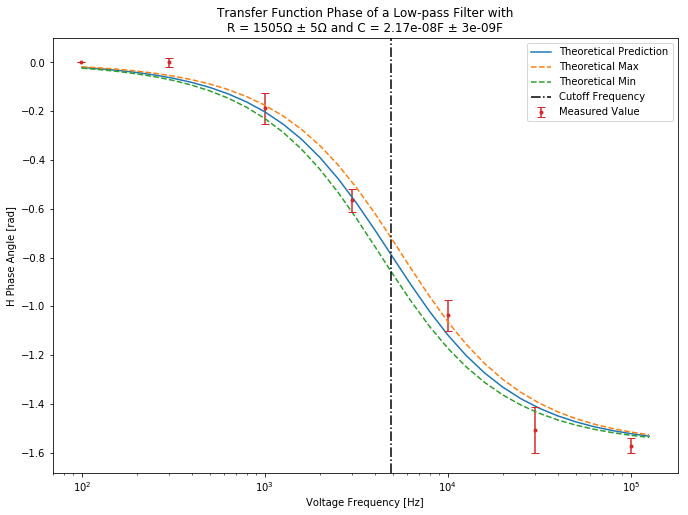

In [21]:
plt.figure(figsize=(11.2, 8))
plt.title("Transfer Function Phase of a Low-pass Filter " +
          "with\nR = {:1g}Ω ± {:1g}Ω and C = {:1g}F ± {:1g}F".format(q_R.mean, q_R.std, q_C.mean, q_C.std))
plt.xlabel("Voltage Frequency [Hz]")
plt.ylabel("H Phase Angle [rad]")
plt.semilogx(freqs_theoretical, phi_theoretical, label="Theoretical Prediction")
plt.semilogx(freqs_theoretical, phi_theoretical + dphi_theoretical, "--", label="Theoretical Max")
plt.semilogx(freqs_theoretical, phi_theoretical - dphi_theoretical, "--", label="Theoretical Min")
plt.axvline(freq_cutoff, label="Cutoff Frequency", color='k', linestyle='dashdot')
plt.errorbar(freqs, phi, fmt=".", yerr=dphi, label="Measured Value", capsize=4)
plt.legend()
plt.show()

In [19]:
for h in dphi:
    print(h)

0.0
0.0188495559215
0.0628946849249
0.0471238898038
0.0628507026277
0.0942477796077
0.0314190681286
